In [92]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
from dataCleaning import bas_filter
%matplotlib inline

In [37]:
bas1, key = bas_filter.import_and_filter('../..', 'Plt1 m', '../../Plt1 Points List.xlsx')

['../..\\Plt1 m 2016-11.csv', '../..\\Plt1 m 2016-12.csv', '../..\\Plt1 m 2017-01.csv', '../..\\Plt1 m 2017-02.csv', '../..\\Plt1 m 2017-03.csv', '../..\\Plt1 m 2017-04.csv', '../..\\Plt1 m 2017-05.csv', '../..\\Plt1 m 2017-06.csv', '../..\\Plt1 m 2017-07.csv', '../..\\Plt1 m 2017-08.csv', '../..\\Plt1 m 2017-09.csv', '../..\\Plt1 m 2017-10.csv', '../..\\Plt1 m 2017-12.csv', '../..\\Plt1 m 2018-01.csv', '../..\\Plt1 m 2018-02.csv', '../..\\Plt1 m 2018-03.csv', '../..\\Plt1 m 2018-04.csv']
CommunicationFailure_COV
Original data contains 143240 points and 414 dimensions.
Filtered data contains 136242 points and 66 dimensions.


In [38]:
bas1.columns

Index(['CDWVLV', 'CDWVLV2', 'CHkW', 'CHWDP2', 'CHWFLO', 'CHWRT', 'CHWRT2',
       'CHWRT3', 'CHWST', 'CHWST2', 'CHWST3', 'CLGMODE',
       'CommunicationFailure', 'CTTR_ALARM', 'HX1CDWRT', 'HX1CDWST',
       'HX1CDWVLV', 'HX1CHWRT', 'HX1CHWST', 'HX1CHWVLV', 'LOOPREQ',
       'MaxCHDPLift', 'MaxCHDTLift', 'MinCHDPLift', 'MinCHDTLift', 'OAH',
       'OAT', 'OAWB', 'PCHWP3Failed', 'PCHWP3HZ', 'PCHWP3kW', 'PCHWP3S',
       'PCHWP3SPD', 'PCHWP3SS', 'PCHWP4Failed', 'PCHWP4HZ', 'PCHWP4kW',
       'PCHWP4S', 'PCHWP4SPD', 'PCHWP4SS', 'PCHWP5Failed', 'PCHWP5HZ',
       'PCHWP5kW', 'PCHWP5S', 'PCHWP5SPD', 'PCHWP5SS', 'SCHWP3Failed',
       'SCHWP3HZ', 'SCHWP3kW', 'SCHWP3S', 'SCHWP3SPD', 'SCHWP3SS',
       'SCHWP4Failed', 'SCHWP4HZ', 'SCHWP4kW', 'SCHWP4S', 'SCHWP4SPD',
       'SCHWP4SS', 'SCHWP5Failed', 'SCHWP5HZ', 'SCHWP5kW', 'SCHWP5S',
       'SCHWP5SPD', 'SCHWP5SS', 'OptimumControl', 'kW/Ton'],
      dtype='object')

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(bas1.values[:, 0:(n-1)], bas1.values[:,(n)], test_size = 0.25, random_state = 42)

#### LASSO

In [64]:
reg_lasso = linear_model.Lasso()
reg_lasso.fit(xtrain, ytrain)
coef = reg_lasso.coef_
lasso_coef = pd.DataFrame(coef, bas1.columns[:-2])
lasso_coef = lasso_coef[coef!=0]
lasso_coef.columns = ['lasso_coef']
print (lasso_coef)
lc = lasso_coef.values.tolist()

      lasso_coef
CHkW    0.002053


0.8516390088699353
0.0025371429969497377


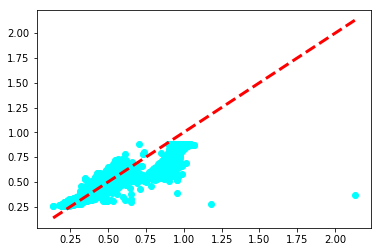

In [113]:
ylas = cross_val_predict(reg_lasso, xtest, ytest)
plt.scatter(ytest, ylas, color = 'cyan')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=3, color = 'red')
print (metrics.r2_score(ytest, ylas))
print (metrics.mean_squared_error(ytest, ylas))

#### LINEAR REGRESSION

In [120]:
reg_linear = linear_model.LinearRegression()
reg_linear.fit(xtrain, ytrain)
coef = reg_linear.coef_
linear_coef = pd.DataFrame(coef, bas1.columns[:-2])
linear_coef = linear_coef[abs(coef) > 1e-02]
linear_coef.columns = ['linear_coef']
linear_coef

,linear_coef
CDWVLV2,1.596151e+09
CHWRT,-1.348031e-02
CHWST,1.663003e-02
CLGMODE,6.687193e+07
CommunicationFailure,5.712598e+07
CTTR_ALARM,4.054382e+07
HX1CDWVLV,4.757083e+07
HX1CHWVLV,-5.681738e+05
LOOPREQ,-2.861640e+05
MaxCHDTLift,1.343562e-02


In [118]:
linear_coef.describe()

,linear_coef
count,1.600000e+01
mean,1.128659e+08
std,3.962763e+08
min,-1.680489e+06
25%,-1.449731e+03
50%,1.699865e-01
75%,4.230057e+07
max,1.596151e+09


0.9564920101104729
0.0007440364951646943


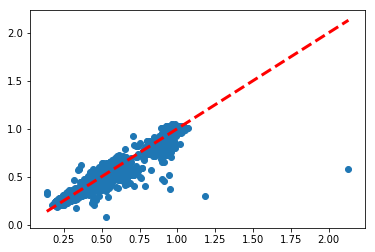

In [119]:
ylin = cross_val_predict(reg_linear, xtest, ytest, cv = 10)
plt.scatter(ytest, ylin)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=3, color = 'red')
print (metrics.r2_score(ytest, ylin))
print (metrics.mean_squared_error(ytest, ylin))